In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# Loading dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/mtcars.csv"
df = pd.read_csv(url)

In [62]:
# Selecting features and target
X = df[['wt', 'hp', 'disp']].values
y = df['mpg'].values.reshape(-1, 1)

In [63]:
# Adding intercept column (w0)
X = np.c_[np.ones(X.shape[0]), X]  # Adds a column of 1s

In [64]:
 # Computing mean and standard deviation
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

In [65]:
 # Avoid division by zero by replacing zeros with a small constant (1e-8)
X_std[X_std == 0] = 1e-8

In [66]:

# Normalizing features (except intercept column)
X[:, 1:] = (X[:, 1:] - X_mean[1:]) / X_std[1:]

In [67]:

# MSE Loss Function
def mse_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# Computing Gradient
def compute_gradient(X, y, W):
    n = X.shape[0]
    y_pred = X @ W
    return (-2 / n) * (X.T @ (y - y_pred))


In [68]:
# Initialization Weights Function
def initialize_weights(init="zero", shape=(4, 1)):
    if init == "zero":
        W = np.zeros(shape)
    elif init == "random":
        W = np.random.randn(*shape) * 0.01  # Small random values
    W[0] = np.mean(y)  # Correct initialization for intercept
    return W



In [69]:
# Batch Gradient Descent (BGD)
def batch_gradient_descent(X, y, lr=0.01, epochs=100, init="zero"):
    W = initialize_weights(init, shape=(X.shape[1], 1))
    loss_history = []
    for epoch in range(epochs):
        grad = compute_gradient(X, y, W)
        W -= lr * grad
        loss_history.append(mse_loss(y, X @ W))
    return W, loss_history




In [70]:
# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, lr=0.01, epochs=100, init="zero"):
    W = initialize_weights(init, shape=(X.shape[1], 1))
    loss_history = []
    n = X.shape[0]
    for epoch in range(epochs):
        indices = np.random.permutation(n)  # Shuffle data
        lr_epoch = lr / (1 + 0.01 * max(1, epoch))  # Prevent zero division
        for i in indices:
            x_i = X[i].reshape(1, -1)
            y_i = y[i].reshape(1, -1)
            grad = compute_gradient(x_i, y_i, W)
            W -= lr_epoch * grad
        loss_history.append(mse_loss(y, X @ W))
    return W, loss_history


In [71]:

# Mini-Batch Gradient Descent (MBGD)
def mini_batch_gradient_descent(X, y, lr=0.01, epochs=100, batch_size=4, init="zero"):
    W = initialize_weights(init, shape=(X.shape[1], 1))
    loss_history = []
    n = X.shape[0]
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        for i in range(0, n, batch_size):
            batch_indices = indices[i: i + batch_size]
            X_batch, y_batch = X[batch_indices], y[batch_indices]
            grad = compute_gradient(X_batch, y_batch, W)
            W -= lr * grad
        loss_history.append(mse_loss(y, X @ W))
    return W, loss_history

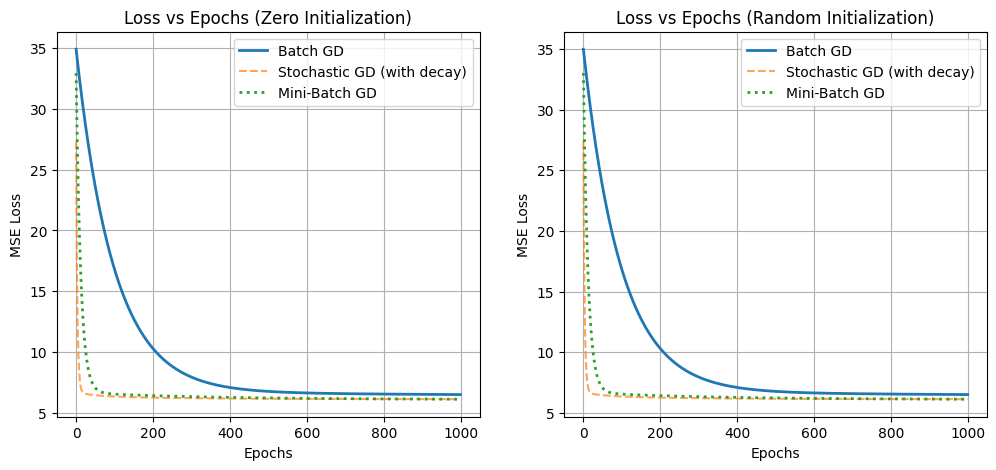

In [72]:
# Training Parameters
epochs = 1000
lr = 0.001

# Run with Zero Initialization
W_bgd_zero, loss_bgd_zero = batch_gradient_descent(X, y, lr, epochs, init="zero")
W_sgd_zero, loss_sgd_zero = stochastic_gradient_descent(X, y, lr, epochs, init="zero")
W_mbgd_zero, loss_mbgd_zero = mini_batch_gradient_descent(X, y, lr, epochs, batch_size=4, init="zero")

# Run with Random Initialization
W_bgd_rand, loss_bgd_rand = batch_gradient_descent(X, y, lr, epochs, init="random")
W_sgd_rand, loss_sgd_rand = stochastic_gradient_descent(X, y, lr, epochs, init="random")
W_mbgd_rand, loss_mbgd_rand = mini_batch_gradient_descent(X, y, lr, epochs, batch_size=4, init="random")

# Plot loss over epochs for Zero Initialization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_bgd_zero, label="Batch GD", linewidth=2)
plt.plot(loss_sgd_zero, label="Stochastic GD (with decay)", linestyle='dashed', alpha=0.7)
plt.plot(loss_mbgd_zero, label="Mini-Batch GD", linestyle='dotted', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Loss vs Epochs (Zero Initialization)")
plt.grid()

# Plot loss over epochs for Random Initialization
plt.subplot(1, 2, 2)
plt.plot(loss_bgd_rand, label="Batch GD", linewidth=2)
plt.plot(loss_sgd_rand, label="Stochastic GD (with decay)", linestyle='dashed', alpha=0.7)
plt.plot(loss_mbgd_rand, label="Mini-Batch GD", linestyle='dotted', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Loss vs Epochs (Random Initialization)")
plt.grid()

plt.show()


In [73]:

# Printing final weights and MSE for Zero Initialization
print("\n==== ZERO INITIALIZATION ====")
print("Final Weights (BGD):", W_bgd_zero.ravel())
print("Final Weights (SGD):", W_sgd_zero.ravel())
print("Final Weights (MBGD):", W_mbgd_zero.ravel())
print("\nFinal MSE (BGD):", loss_bgd_zero[-1])
print("Final MSE (SGD):", loss_sgd_zero[-1])
print("Final MSE (MBGD):", loss_mbgd_zero[-1])

# Printing final weights and MSE for Random Initialization
print("\n==== RANDOM INITIALIZATION ====")
print("Final Weights (BGD):", W_bgd_rand.ravel())
print("Final Weights (SGD):", W_sgd_rand.ravel())
print("Final Weights (MBGD):", W_mbgd_rand.ravel())
print("\nFinal MSE (BGD):", loss_bgd_rand[-1])
print("Final MSE (SGD):", loss_sgd_rand[-1])
print("Final MSE (MBGD):", loss_mbgd_rand[-1])


==== ZERO INITIALIZATION ====
Final Weights (BGD): [20.090625   -2.28840519 -1.7198075  -1.73412259]
Final Weights (SGD): [20.09106311 -3.27465082 -1.92169741 -0.64512408]
Final Weights (MBGD): [20.09152858 -3.29405236 -1.93012138 -0.61711923]

Final MSE (BGD): 6.51039475000295
Final MSE (SGD): 6.1331406524397
Final MSE (MBGD): 6.129160753284932

==== RANDOM INITIALIZATION ====
Final Weights (BGD): [20.090625   -2.28466479 -1.71961667 -1.73780493]
Final Weights (SGD): [20.09107774 -3.27356917 -1.92130482 -0.64673996]
Final Weights (MBGD): [20.09141804 -3.29522501 -1.93119183 -0.61760356]

Final MSE (BGD): 6.5125169438584924
Final MSE (SGD): 6.133371644287908
Final MSE (MBGD): 6.129093692544028
